# **AP157 Machine Learning Lab Assignment**
### Module B1: Digital Image Formation and Enhancement

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1 and 2 are worth 20 and 80 points, respectively).

_Credits_: This lab assignment is based on the AP157 modules of Dr. Maricor Soriano and scripts created by Mr. Rene Principe

### Student Information

_Full Name (Last Name, First Name)_: Paul Kenneth H. Remo \
_Student No._: 2020-01185\
_Section_ TX1:

### Submission Information

_Date and Time Submitted (most recent upload)_ 04/14/2024, 2:47AM:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: PAUL KENNETH H. REMO**

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/30
* Part 2 - []/30
* Part 3 - []/40

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

In [2]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#### PART 1 - Create synthetic greyscale images *(30 points)*

Simulate a 1 cm x 1 cm optical element with a sinusoid along the x-direction with a given frequency-- generate images with frequencies of 1, 3, and 5 cycles/cm. The size of each image should be 400x400 pixels.

For each frequency, show the:
1. [15 pts.; 5 pts. each] Image heatmap (range of pixel values should be between 0 to 255)
2. [15 pts.; 5 pts. each] Plot showing 3-D view



Sample output for frequency of 5 cycles/cm is uploaded to the Google Drive Datasets folder: https://drive.google.com/file/d/1770FiH4FPm0C_fCpRGorr64x-RIv9UOY/view?usp=drive_link



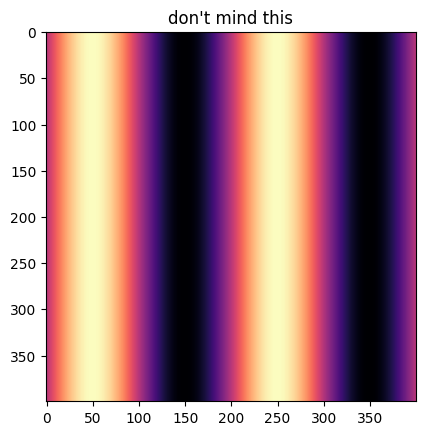

In [157]:
# Create grid
N = 400
xx = np.linspace(-1, 1, N)
X, Y = np.meshgrid(xx, xx) # both X and Y are NxN arrays with X and Y coordinates from [-1,1] centered at (0,0)

#Setting up the sinusoids
A = 1
freq1, freq3, freq5 = 1, 3, 5
sin = (2*X)*np.pi
sine1 = A*np.sin(sin*freq1)
sine3 = A*np.sin(2*X*np.pi*freq3)
sine5 = A*np.sin(2*X*np.pi*freq5)

#Making a colorbar for the plots
colorbar = plt.imshow((sine1), cmap = 'magma')
plt.title("don't mind this")
plt.show()
#Don't mind the plot showing up next, it's just a consequence of the code I made

Now that we've assembled the grid and sinusoid, we set up the plots and display them

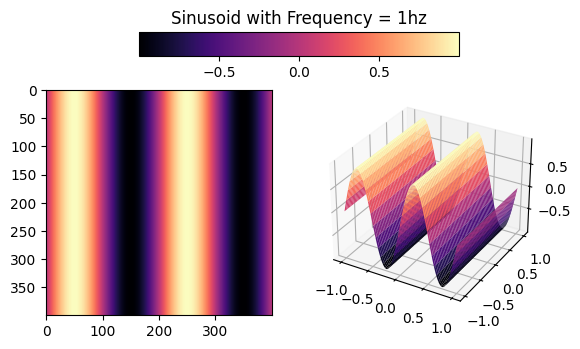

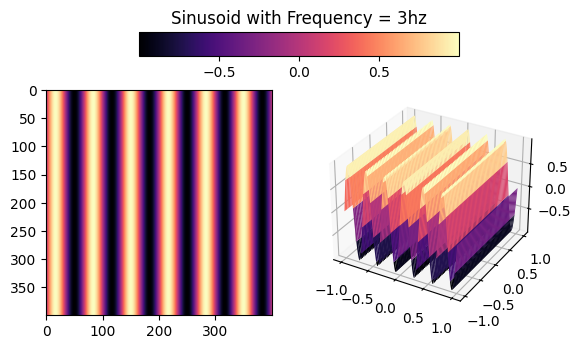

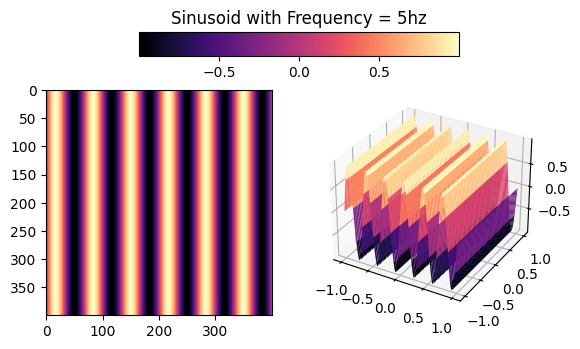

In [158]:
#Now we set up the 2d and 3d perspectives of the sinusoids with varying frequencies
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(sine1, cmap = 'magma')
ax2 = ax1 = fig.add_subplot(122, projection = '3d')
ax2.plot_surface(X, Y, sine1, cmap = 'magma')
ax = fig.add_axes([0.27, 0.8, 0.5, 0.05])
fig.colorbar(colorbar, cax=ax, orientation='horizontal')
plt.title('Sinusoid with Frequency = 1hz')
plt.show()


fig2 = plt.figure()
ax3 = fig2.add_subplot(121)
ax3.imshow(sine3, cmap = 'magma')
ax4 = fig2.add_subplot(122, projection = '3d')
ax4.plot_surface(X, Y, sine3, cmap = 'magma')
ax = fig.add_axes([0.27, 0.8, 0.5, 0.05])
fig2.colorbar(colorbar, cax=ax, orientation='horizontal')
ax = fig2.add_axes([0.27, 0.8, 0.5, 0.05])
fig2.colorbar(colorbar, cax=ax, orientation='horizontal')
plt.title('Sinusoid with Frequency = 3hz')
plt.show()


fig3 = plt.figure()
ax5 = fig3.add_subplot(121)
ax5.imshow(sine3, cmap = 'magma')
ax6 = fig3.add_subplot(122, projection = '3d')
ax6.plot_surface(X, Y, sine3, cmap = 'magma')
ax = fig3.add_axes([0.27, 0.8, 0.5, 0.05])
fig3.colorbar(colorbar, cax=ax, orientation='horizontal')
plt.title('Sinusoid with Frequency = 5hz')
plt.show()

All 3 sinusoids are now plotted in a 400x400 grid ranging from X and Y values of [-1,1]

#### PART 2 - Create color images *(30 points)*

Recreate the Olympics logo as an image. It is fine if the colors overlap where the rings intersect.

Sample output is uploaded to the Google Drive Datasets folder: https://drive.google.com/file/d/1770FiH4FPm0C_fCpRGorr64x-RIv9UOY/view?usp=drive_link

In [159]:
#We define a function to create an annulus
def annulus(Color, R, X, x, Y, y, i, o):
    R = np.sqrt((X + x)**2 + (Y/2 + y/2)**2)
    i = i
    o = o
    #Setting the values inside the larger radius and outside the smaller radius as 0
    #For our purposes, we will use a function that does not add the specified color, but rather removes it
    Color[np.where((R < i) & (R > o))] = 0
    return Color

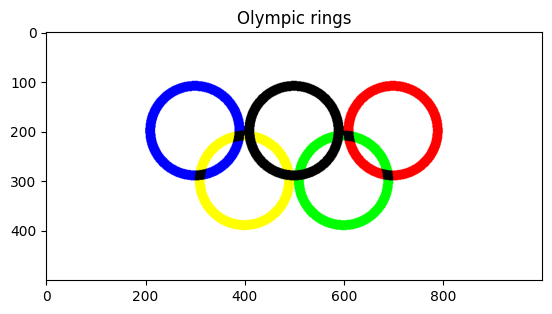

In [160]:
M = 1000
N = 500
xx = np.linspace(-1, 1, N)
yy = np.linspace(-1, 1, M)
X1, Y1 = np.meshgrid(yy, xx)

red, grn, blu = np.zeros((N, M)), np.zeros((N, M)), np.zeros((N, M))
hori, bot = 0.2, 0.2
rad1 = 0.2
rad2 = 0.160
rgb = np.zeros((N, M, 3))
rgb[:, :, 0] = red
rgb[:, :, 1] = grn
rgb[:, :, 2] = blu

#We set the canvas as white
rgb[np.where((red == 0) & (grn == 0) & (blu == 0))] = 1

rgb = annulus(rgb, rad1, X1, 0, Y1, bot, rad1, rad2)
#We now subtract the colors in each RGB value
red = annulus(rgb[:,:,0], rad1, X1, -hori, Y1, -bot, rad1, rad2) + annulus(rgb[:,:,0], rad1, X1, 2*hori, Y1, bot, rad1, rad2)
grn = annulus(rgb[:, :, 1], rad1, X1, -2*hori, Y1, bot, rad1, rad2) + annulus(rgb[:,:,1], rad1, X1, 2*hori, Y1, bot, rad1, rad2)
blu = annulus(rgb[:, :, 2], rad1, X1, -2*hori, Y1, bot, rad1, rad2) + annulus(rgb[:,:,2], rad1, X1, hori, Y1, -bot, rad1, rad2) + annulus(rgb[:,:,2], rad1, X1, -hori, Y1, -bot, rad1, rad2)
# Create grid
plt.imshow(rgb)
plt.title('Olympic rings')
plt.show()


We did the creation of synthetic images backwards because the Olympic rings logo has a white background, hence we started with all RGB values of 1 and removed specific colors to get to where we are

#### PART 3 - Apply image enhancement *(40 points)*

Apply contrast stretching to an astronaut image.

Show the following:
1. [20 pts.] Original and contrast-stretched image
2. [10 pts.] Probability Distribution Function (PDF) plot showing curves for the original and contrast-stretched image
3. [10 pts.] Cumulative Distribution Function (CDF) plot showing curves for the original and contrast-stretched image

Sample output is uploaded to the Google Drive Datasets folder: https://drive.google.com/file/d/12-cPwAr7hVUPBKIthvcQgvqjvEOmwyxJ/view?usp=drive_link

First step is to load the image-- available from the scikit-image (skimage) library-- and make a low-contrast version, using the code below:

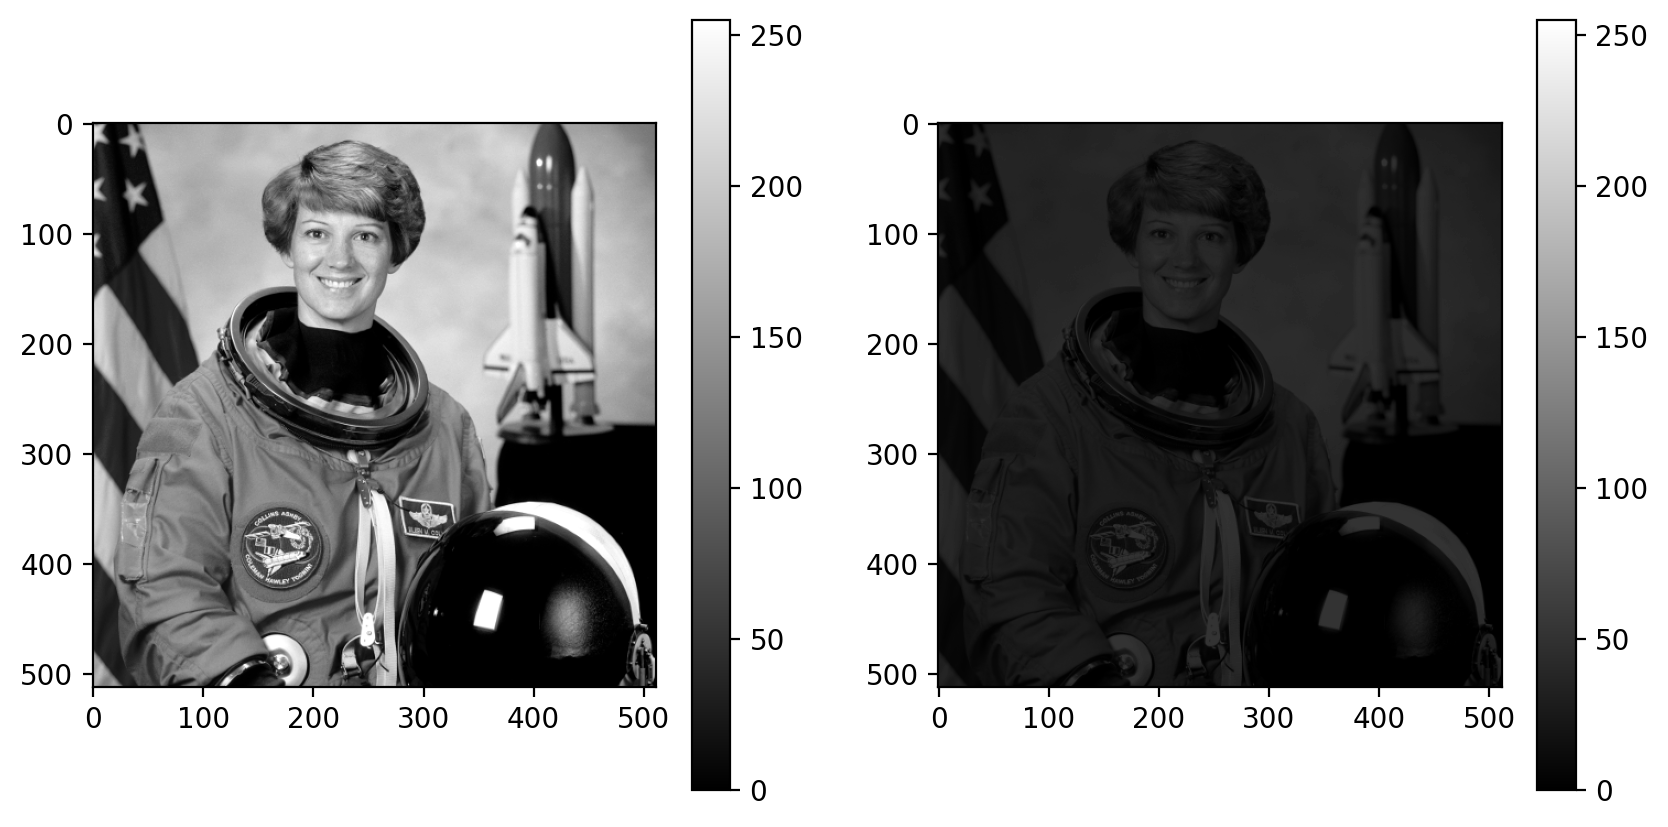

In [183]:
from skimage import color, data, exposure
from skimage.transform import rescale
import cv2

img = color.rgb2gray(data.astronaut())*256 # original astronaut image
plt.figure(figsize=(10,5), dpi = 200)
plt.subplot(121)
plt.imshow(img, cmap = 'gray', vmax = 255)
plt.colorbar()

img_low_contrast = img/5 # low contrast astronaut image
plt.subplot(122)
plt.imshow(img_low_contrast, cmap = 'gray', vmax = 255)
plt.colorbar()
plt.show()

Next, write your code to apply contrast stretching, calculate the PDF and CDF of the original and contrast-stretched images. Finally, display the images and PDF and CDF plots.

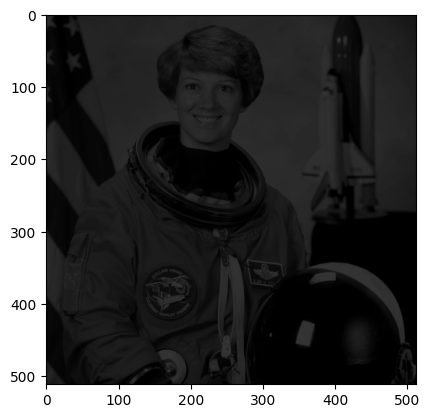

In [185]:
plt.imshow(img_low_contrast, cmap ='gray', vmax = 255)
plt.show()
#Just testing

In [197]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [237]:
#Define a PDF function to return the intensities from 0 to 256 and the count of pixels with said intesities
def pdf(img, m, n):
    count = []
    r = np.zeros(256) 
    for i in range(len(r)):
        r[i] = i
        count1 = 0
        for j in range(m):
            for k in range(n):
                if img[j, k]== i:
                    count1+= 1
        count.append(count1)
    return (r, count)

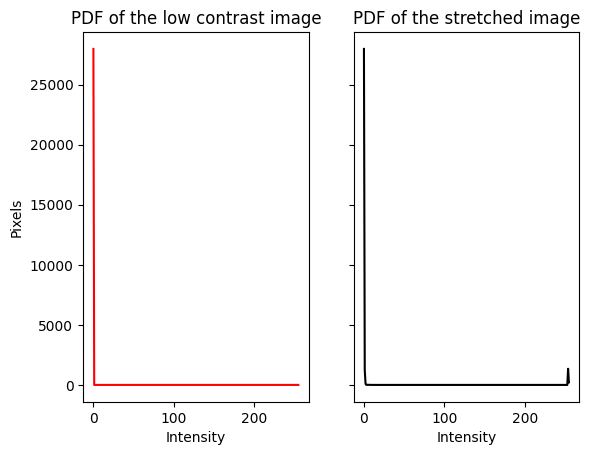

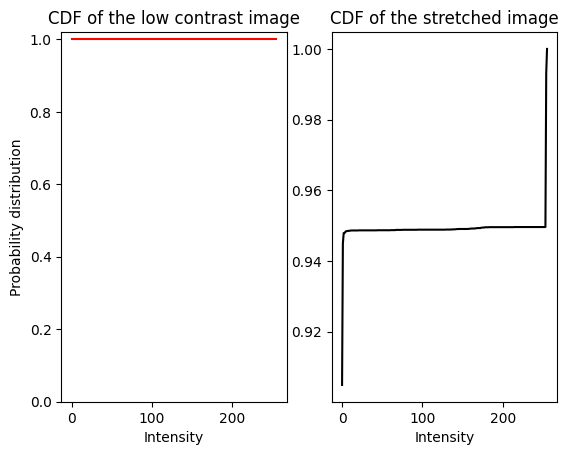

In [270]:
#Set the low contrast image as a simpler variable for brevity
img = img_low_contrast
m, n = img.shape
#Get the intensity and count of the original image to get the PDF of the original image
r1, count1 = pdf(img, m, n)
#Get the constant to stretch the contrastn of the image and apply it to the image
constant = (255-0)/(img.max()-img.min())
img_stretch = img * constant
#Get the intensity and count of the stretched image for its PDF
r2, count2 = pdf(img_stretch, m, n)

#CDF Stuff
cnt = np.array(count1)
#Turn the count to an array and get its cumulative sum
cdf = cnt.cumsum()
#Normalize the cdf to get a max of 1
cdf_n = cdf/np.max(cdf)
#Repeat for the stretched image
cnt2 = np.array(count2)
cdf2 = cnt2.cumsum()
cdf2_n = cdf2/np.max(cdf2)

#Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, sharey = True)
plt.title('PDF of the low contrast vs stretched images')
ax1.plot(r1, count1, color = 'red')
ax1.set_xlabel('Intensity')
ax1.set_ylabel('Pixels')
ax1.title.set_text('PDF of the low contrast image')
ax2.plot(r2, count2, color = '0')
ax2.set_xlabel('Intensity')
ax2.title.set_text('PDF of the stretched image')

fig, (ax3, ax4) = plt.subplots(1, 2)
ax3.plot(r1, cdf_n, color ='red')
ax3.set_xlabel('Intensity')
ax3.set_ylabel('Probability distribution')
ax3.set_ylim(0, 1.02)
ax3.title.set_text('CDF of the low contrast image')
ax4.plot(r2, cdf2_n, color ='0')
ax4.set_xlabel('Intensity')
ax4.title.set_text('CDF of the stretched image')
plt.show()

To be honest, the PDF did not look pretty in both the original and stretched image, but when we recover the contras stretched image, we still get the original image back eiterway. The CDF reflects the PDF since there were only 2 peaks from the stretched PDF, hence its CDF looks like a step-function.

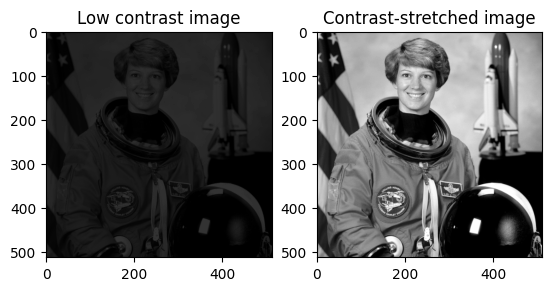

In [272]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(img, cmap = 'gray', vmax = 255)
ax1.title.set_text('Low, contrast image')
plt.title('Low contrast image')
ax2 = fig.add_subplot(122)
ax2.imshow(img_stretch, cmap = 'gray', vmax = 255)
ax2.title.set_text('Contrast-stretched image')
plt.show()

We recover the original image

**Now let us try to save my sunshine**

In [278]:
import os
import sys
import skimage.color as skim
par_path = os.path.abspath(os.path.join('..'))
if par_path not in sys.path:
    sys.path.append(par_path)
data_path = os.path.join(par_path, 'data')

In [279]:
sunshine = cv2.imread(os.path.join(data_path, 'YouAreMySunshine.jpg'))
sunshine_gray = skim.rgb2gray(sunshine)
o, p = sunshine_gray.shape
r3, count3 = pdf(sunshine_gray, o, p)
constant = (255-0)/(sunshine_gray.max()-sunshine_gray.min())
sunshine_stretch = sunshine_gray * constant
r4, count4 = pdf(sunshine_stretch, o, p)

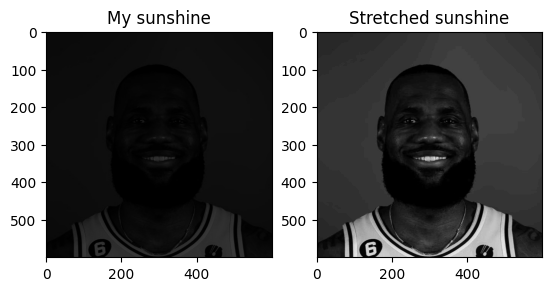

In [280]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(sunshine, cmap = 'gray', vmin = 0, vmax = 255)
ax1.title.set_text('My sunshine')
ax2.imshow(sunshine_stretch, cmap = 'gray', vmin = 0, vmax = 255)
ax2.title.set_text('Stretched sunshine')
plt.show()

Note: The original meme is too far gone so I made my own ruined image, and it gor recovered yay